# **Fase 2: Análisis Exploratorio de Datos (EDA)**

### Cargar datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


In [2]:
df = pd.read_json("medicamentos.json")
print(df.shape)
df.head()

(17808, 2)


,totalRegistros,medicamentos
0,17808,"{'apresentacoes': [{'codigo': 1587717, 'aprese..."
1,17808,"{'apresentacoes': [{'codigo': 2061908, 'aprese..."
2,17808,"{'apresentacoes': [{'codigo': 1743337, 'aprese..."
3,17808,"{'apresentacoes': [{'codigo': 404393311, 'apre..."
4,17808,"{'apresentacoes': [{'codigo': 1708796, 'aprese..."


In [3]:
df_normalizado = pd.json_normalize(df['medicamentos'])
df_normalizado.head(5)

,apresentacoes,id,codigo,numeroRegistro,nomeProduto,numeroProcesso,empresaNome,empresaCnpj,principioAtivo,tarja,...,bula_txt,bula_pdf,bula_txt_profissional,bula_pdf_profissional,categoriaRegulatoria,situacaoRegistro,dataProduto,dataVencimentoRegistro,dataPublicacao,indicacao
0,"[{'codigo': 1587717, 'apresentacao': '0,8 MG/M...",1,1012584,188300060,ácido zoledrônico,25351771065201417,VIATRIS FARMACEUTICA DO BRASIL LTDA,11643096000122,ÁCIDO ZOLEDRÔNICO MONOIDRATADO,Vermelha sob restrição,...,\n\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n...,repo/storage/25351771065201417_paciente.pdf,\n\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n...,repo/storage/25351771065201417_profissional.pdf,Genérico,ATIVO,2018-10-01T03:00:00.000Z,2028-10-01T03:00:00.000Z,2024-08-07T11:18:54.000Z,
1,"[{'codigo': 2061908, 'apresentacao': '150 MG C...",2,1595612,123520278,ácido ursodesoxicólico,25351843204202031,RANBAXY FARMACÊUTICA LTDA,73663650000190,ÁCIDO URSODESOXICÓLICO,Vermelha,...,\n\n ...,repo/storage/25351843204202031_paciente.pdf,\n\n ...,repo/storage/25351843204202031_profissional.pdf,Genérico,ATIVO,2020-10-26T03:00:00.000Z,2030-07-01T03:00:00.000Z,2024-12-19T13:42:22.000Z,
2,"[{'codigo': 1743337, 'apresentacao': '250 MG C...",3,1250613,109740258,ácido valpróico,25351114943201805,BIOLAB SANUS FARMACÊUTICA LTDA,49475833000106,"VALPROATO DE SÓDIO, ÁCIDO VALPRÓICO",Vermelha sob restrição,...,\n\n \n \n \n \n \n \n \n \n \n \n \n \n \náci...,repo/storage/25351114943201805_paciente.pdf,\n\n \n \n \n \n \n \n \n \n \n \n \n \nácido ...,repo/storage/25351114943201805_profissional.pdf,Genérico,ATIVO,2018-05-28T03:00:00.000Z,2028-05-01T03:00:00.000Z,2024-12-12T11:57:27.000Z,
3,"[{'codigo': 404393311, 'apresentacao': '20 MG/...",4,3482995,118190298,ácido fusídico + valerato de betametasona,25351063014202207,MULTILAB INDUSTRIA E COMERCIO DE PRODUTOS FARM...,92265552000905,"ÁCIDO FUSÍDICO, VALERATO DE BETAMETASONA",Vermelha sob restrição,...,\n\n \n \n \n \n \n \n \n \n \n \n \n \n \náci...,repo/storage/25351063014202207_paciente.pdf,\n\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n...,repo/storage/25351063014202207_profissional.pdf,Genérico,ATIVO,2022-08-08T03:00:00.000Z,2029-10-01T03:00:00.000Z,2024-06-06T20:53:54.000Z,
4,"[{'codigo': 1708796, 'apresentacao': '20 MG CO...",5,1177203,100431217,ÉSIO,25351318508201769,EUROFARMA LABORATÓRIOS S.A.,61190096000192,ESOMEPRAZOL MAGNÉSICO,Vermelha,...,\n\n \nÉsio_com rev lib retard_VP_V04 \n ...,repo/storage/25351318508201769_paciente.pdf,\n\n \nÉsio_com rev lib retard_VPS_V04 \n \n ...,repo/storage/25351318508201769_profissional.pdf,Similar,ATIVO,2017-07-17T03:00:00.000Z,2027-07-01T03:00:00.000Z,2021-08-30T14:06:57.000Z,


In [4]:
df_normalizado.dtypes

apresentacoes             object
id                         int64
codigo                    object
numeroRegistro            object
nomeProduto               object
numeroProcesso            object
empresaNome               object
empresaCnpj               object
principioAtivo            object
tarja                     object
medicamentoReferencia     object
classesTerapeuticas       object
bula_txt                  object
bula_pdf                  object
bula_txt_profissional     object
bula_pdf_profissional     object
categoriaRegulatoria      object
situacaoRegistro          object
dataProduto               object
dataVencimentoRegistro    object
dataPublicacao            object
indicacao                 object
dtype: object

In [5]:
# 1) Explota la lista de dicts
df_exp = df_normalizado.explode('apresentacoes', ignore_index=True)

# 2) Normaliza los dicts de 'apresentacoes' (sep='.' para aplanar niveles)
df_apr = pd.json_normalize(df_exp['apresentacoes'], sep='.')

# 3) Detecta columnas duplicadas respecto a las originales
orig_cols = set(df_exp.columns) - {'apresentacoes'}   # todas menos la anidada
dup_cols  = orig_cols.intersection(df_apr.columns)    # choques (p. ej. 'codigo', 'tarja', ...)

# 4) Renombra solo las duplicadas con el prefijo 'apresentacoes.'
df_apr = df_apr.rename(columns={c: f"apresentacoes.{c}" for c in dup_cols})

# 5) Concatena, conservando columnas originales y las expandidas
df_final = pd.concat([df_exp.drop(columns=['apresentacoes']), df_apr], axis=1)

In [6]:
df_final

,id,codigo,numeroRegistro,nomeProduto,numeroProcesso,empresaNome,empresaCnpj,principioAtivo,tarja,medicamentoReferencia,...,apresentacoes.medicamentoReferencia,apresentacaoFracionada,apresentacoes.dataVencimentoRegistro,tipoAutorizacao,ativa,emAnalise,inativa,embalagemSecundaria.tipo,embalagemSecundaria.observacao,embalagemSecundaria
0,1,1012584,188300060,ácido zoledrônico,25351771065201417,VIATRIS FARMACEUTICA DO BRASIL LTDA,11643096000122,ÁCIDO ZOLEDRÔNICO MONOIDRATADO,Vermelha sob restrição,ZOMETA,...,N,N,NaN,REGISTRADO,True,False,False,Cartucho,Cartucho de cartolina,NaN
1,1,1012584,188300060,ácido zoledrônico,25351771065201417,VIATRIS FARMACEUTICA DO BRASIL LTDA,11643096000122,ÁCIDO ZOLEDRÔNICO MONOIDRATADO,Vermelha sob restrição,ZOMETA,...,N,N,NaN,REGISTRADO,True,False,False,Cartucho,Cartucho de cartolina,NaN
2,1,1012584,188300060,ácido zoledrônico,25351771065201417,VIATRIS FARMACEUTICA DO BRASIL LTDA,11643096000122,ÁCIDO ZOLEDRÔNICO MONOIDRATADO,Vermelha sob restrição,ZOMETA,...,N,N,NaN,REGISTRADO,True,False,False,Cartucho,Cartucho de cartolina,NaN
3,2,1595612,123520278,ácido ursodesoxicólico,25351843204202031,RANBAXY FARMACÊUTICA LTDA,73663650000190,ÁCIDO URSODESOXICÓLICO,Vermelha,Ursacol®,...,N,N,NaN,REGISTRADO,True,False,False,Cartucho,Cartucho de Cartolina,NaN
4,2,1595612,123520278,ácido ursodesoxicólico,25351843204202031,RANBAXY FARMACÊUTICA LTDA,73663650000190,ÁCIDO URSODESOXICÓLICO,Vermelha,Ursacol®,...,N,N,NaN,REGISTRADO,True,False,False,Cartucho,Cartucho de Cartolina,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60762,17805,None,None,Florbetaben (18F),25351378833202167,UNIÃO BRASILEIRA DE EDUCAÇÃO E ASSISTÊNCIA,88630413000109,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60763,17806,None,None,Gallium-68,25351540996202256,R2 SOLUÇÕES EM RADIOFARMÁCIA,09240065000340,OCTREOTIDA NOTA ALUMÍNIO (18 F),None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60764,17807,None,None,PIB (11C),25351640125202151,HOSPITAL DAS CLINICAS DA FACULDADE DE MEDICINA...,60448040000122,PIBENZOTIAZOL (11 C),None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60765,17808,None,None,PSMA - 1007 (18F),25351140602202263,IBF,14864868000144,AMESPRO FLUORNICOTINAMIDA (18 F),None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_final.columns

Index(['id', 'codigo', 'numeroRegistro', 'nomeProduto', 'numeroProcesso',
       'empresaNome', 'empresaCnpj', 'principioAtivo', 'tarja',
       'medicamentoReferencia', 'classesTerapeuticas', 'bula_txt', 'bula_pdf',
       'bula_txt_profissional', 'bula_pdf_profissional',
       'categoriaRegulatoria', 'situacaoRegistro', 'dataProduto',
       'dataVencimentoRegistro', 'dataPublicacao', 'indicacao',
       'apresentacoes.codigo', 'apresentacao', 'formasFarmaceuticas', 'numero',
       'tonalidade', 'apresentacoes.dataPublicacao', 'validade',
       'tipoValidade', 'registro', 'principiosAtivos', 'complemento',
       'qtdUnidadeMedida', 'embalagemPrimaria', 'embalagemPrimariaTodas',
       'embalagemSecundariaTodas', 'envoltorios', 'acessorios',
       'acondicionamento', 'marcas', 'fabricantesNacionais',
       'fabricantesInternacionais', 'viasAdministracao', 'ifaUnico',
       'conservacao', 'restricaoPrescricao', 'restricaoUso', 'destinacao',
       'restricaoHospitais', 'apresent

In [8]:
for col in df_final.columns:
    if df_final[col].apply(lambda x: isinstance(x, (list, dict))).any():
        print(f"⚠️ La columna '{col}' contiene listas o diccionarios")

⚠️ La columna 'formasFarmaceuticas' contiene listas o diccionarios
⚠️ La columna 'principiosAtivos' contiene listas o diccionarios
⚠️ La columna 'embalagemPrimariaTodas' contiene listas o diccionarios
⚠️ La columna 'embalagemSecundariaTodas' contiene listas o diccionarios
⚠️ La columna 'envoltorios' contiene listas o diccionarios
⚠️ La columna 'acessorios' contiene listas o diccionarios
⚠️ La columna 'marcas' contiene listas o diccionarios
⚠️ La columna 'fabricantesNacionais' contiene listas o diccionarios
⚠️ La columna 'fabricantesInternacionais' contiene listas o diccionarios
⚠️ La columna 'viasAdministracao' contiene listas o diccionarios
⚠️ La columna 'conservacao' contiene listas o diccionarios
⚠️ La columna 'restricaoPrescricao' contiene listas o diccionarios
⚠️ La columna 'restricaoUso' contiene listas o diccionarios
⚠️ La columna 'destinacao' contiene listas o diccionarios


In [9]:
df_final = df_final.explode('formasFarmaceuticas', ignore_index=True)
df_final.shape

(61144, 60)

In [10]:
df_final = df_final.explode('principiosAtivos', ignore_index=True)
df_final.shape

(75606, 60)

In [11]:
df_final = df_final.explode('embalagemPrimariaTodas', ignore_index=True)
df_final.shape

(76338, 60)

In [12]:
df_final = df_final.explode('embalagemSecundariaTodas', ignore_index=True)
df_final.shape

(78228, 60)

In [13]:
df_final = df_final.explode('envoltorios', ignore_index=True)
df_final.shape

(78228, 60)

In [14]:
df_final = df_final.explode('acessorios', ignore_index=True)
df_final.shape

(78228, 60)

In [15]:
df_final = df_final.explode('marcas', ignore_index=True)
df_final.shape

(78228, 60)

In [16]:
df_final = df_final.explode('fabricantesNacionais', ignore_index=True)
df_final.shape

(98735, 60)

In [17]:
df_final = df_final.explode('fabricantesInternacionais', ignore_index=True)
df_final.shape

(107525, 60)

In [18]:
df_final = df_final.explode('viasAdministracao', ignore_index=True)
df_final.shape

(109736, 60)

In [19]:
df_final = df_final.explode('conservacao', ignore_index=True)
df_final.shape

(196424, 60)

In [20]:
df_final = df_final.explode('restricaoPrescricao', ignore_index=True)
df_final.shape

(196795, 60)

In [21]:
df_final = df_final.explode('restricaoUso', ignore_index=True)
df_final.shape

(197049, 60)

In [22]:
df_final = df_final.explode('destinacao', ignore_index=True)
df_final.shape

(219707, 60)

# Validación de datos

## Revisión de valores faltantes:

### Tipos de datos de las variables del conjunto de datos

In [23]:
df_final.dtypes

id                                        int64
codigo                                   object
numeroRegistro                           object
nomeProduto                              object
numeroProcesso                           object
empresaNome                              object
empresaCnpj                              object
principioAtivo                           object
tarja                                    object
medicamentoReferencia                    object
classesTerapeuticas                      object
bula_txt                                 object
bula_pdf                                 object
bula_txt_profissional                    object
bula_pdf_profissional                    object
categoriaRegulatoria                     object
situacaoRegistro                         object
dataProduto                              object
dataVencimentoRegistro                   object
dataPublicacao                           object
indicacao                               

### cantidad de variables por tipo de datos

In [24]:
(
    df_final.dtypes.value_counts()
)

object     52
float64     7
int64       1
Name: count, dtype: int64

### Variables y observaciones del conjunto de datos

In [25]:
df_final.shape

(219707, 60)

### Valores nulos del conjunto de datos

In [26]:
(
    df_final.isnull().sum()
)

id                                           0
codigo                                   12046
numeroRegistro                             153
nomeProduto                                  0
numeroProcesso                               0
empresaNome                                  0
empresaCnpj                                  0
principioAtivo                              95
tarja                                    68409
medicamentoReferencia                    86063
classesTerapeuticas                        126
bula_txt                                 11141
bula_pdf                                 11140
bula_txt_profissional                    11135
bula_pdf_profissional                    11134
categoriaRegulatoria                       618
situacaoRegistro                             0
dataProduto                                570
dataVencimentoRegistro                     958
dataPublicacao                               0
indicacao                                12046
apresentacoes

Text(0.5, 1.02, 'Proporción de valores nulos y no nulos por variable')

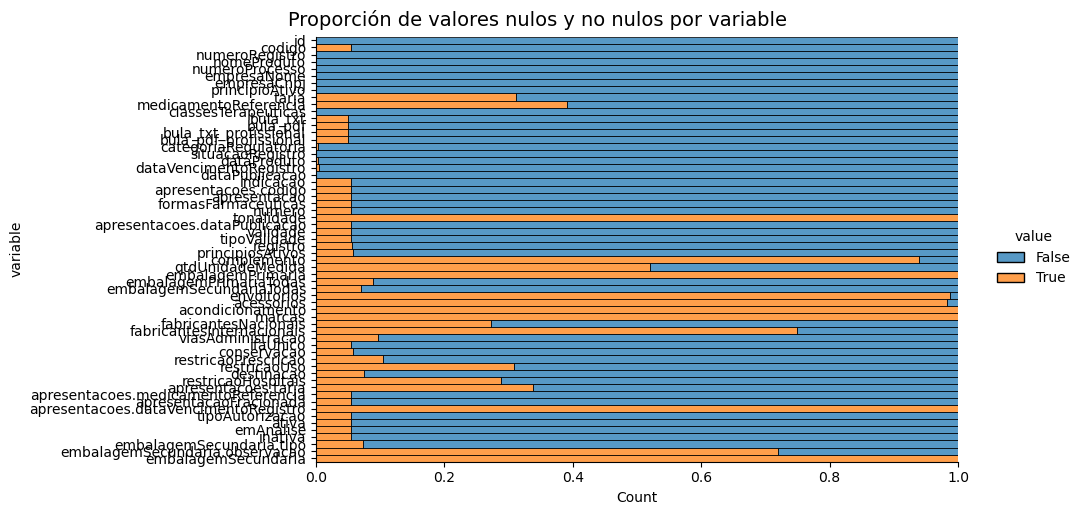

In [27]:
(
    df_final
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y="variable",
                hue="value",
                multiple="fill",
                aspect=2
                
        )
        )
    )
).fig.suptitle("Proporción de valores nulos y no nulos por variable", fontsize=14, y=1.02)

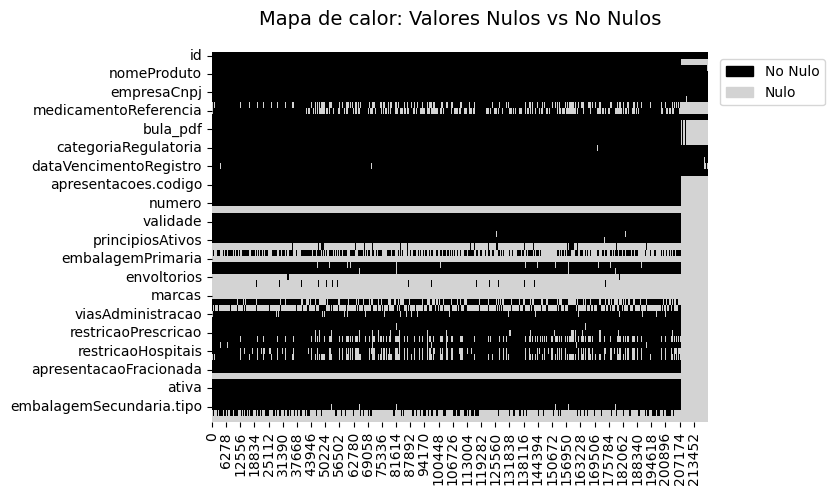

In [28]:
cmap = ListedColormap(["black", "lightgray"])
ax = (
    df_final
    .isnull().
    transpose()
    .pipe(
        lambda df: (
            sns.heatmap(
                data=df,
                cbar=False,
                cmap=cmap,
            )
        )
    )
)
plt.title("Mapa de calor: Valores Nulos vs No Nulos", fontsize=14, pad=20)


legend_patches = [
    mpatches.Patch(color="black", label="No Nulo"),
    mpatches.Patch(color="lightgray", label="Nulo")
]

# Agregar la leyenda al gráfico
plt.legend(
    handles=legend_patches,
    loc="upper right",   
    bbox_to_anchor=(1.25, 1)  
)

plt.show()

In [29]:
df_final.isnull().mean() * 100


id                                        0.000000
codigo                                    5.482757
numeroRegistro                            0.069638
nomeProduto                               0.000000
numeroProcesso                            0.000000
empresaNome                               0.000000
empresaCnpj                               0.000000
principioAtivo                            0.043239
tarja                                    31.136468
medicamentoReferencia                    39.171715
classesTerapeuticas                       0.057349
bula_txt                                  5.070844
bula_pdf                                  5.070389
bula_txt_profissional                     5.068113
bula_pdf_profissional                     5.067658
categoriaRegulatoria                      0.281284
situacaoRegistro                          0.000000
dataProduto                               0.259436
dataVencimentoRegistro                    0.436035
dataPublicacao                 

In [30]:
print("cantidad de filas nulas:")
print(df_final.isnull().all(axis=1).sum())
cols_nullas = df_final.columns[df_final.isnull().all(axis=0)]
print("Columnas completamente nulas:")
print(cols_nullas.tolist())

cantidad de filas nulas:
0
Columnas completamente nulas:
['tonalidade', 'embalagemPrimaria', 'acondicionamento', 'marcas', 'apresentacoes.dataVencimentoRegistro', 'embalagemSecundaria']


In [31]:
missing_info = (
    df_final.isnull().sum()
    .to_frame("nulos")
    .assign(porcentaje=lambda x: x.nulos / len(df_final) * 100)
    .sort_values("porcentaje", ascending=False)
)
print(missing_info)

                                       nulos  porcentaje
tonalidade                            219707  100.000000
acondicionamento                      219707  100.000000
marcas                                219707  100.000000
embalagemPrimaria                     219707  100.000000
embalagemSecundaria                   219707  100.000000
apresentacoes.dataVencimentoRegistro  219707  100.000000
envoltorios                           216843   98.696446
acessorios                            215964   98.296367
complemento                           206418   93.951490
fabricantesInternacionais             164473   74.860155
embalagemSecundaria.observacao        158139   71.977224
qtdUnidadeMedida                      114390   52.064795
medicamentoReferencia                  86063   39.171715
apresentacoes.tarja                    74262   33.800471
tarja                                  68409   31.136468
restricaoUso                           67634   30.783726
restricaoHospitais             

### Cuantificacion de la magnitud del problema:
Se identificaron esta columnas sin datos:
'tonalidade', 'embalagemPrimaria', 'acondicionamento', 'marcas', 'apresentacoes.dataVencimentoRegistro', 'embalagemSecundaria'

* esta primera parte encontrada se puede eliminar ya que no tiene un impacto sobre el dataset.
* Las columnas vacias se pueden eleminar ya que la tonalidad del medicamento y el embalage no son necesarios para el objetivo de este analisis.
* la "dataVencimentoRegistro" de no es necesaria ya que con la la columna "dataPublicacao" y la columna "validade" podemos calcular la "dataVencimentoRegistro"
* la columna "acondicionamento" Se refiere al tipo de acondicionamiento del producto: cómo se empaca o presenta al mercado (ej. caja con 10 tabletas, frasco de 250 ml, etc.). Se puede eliminar porque no se hara análisis de mercializacioon o logistica.
* Las columnas envoltorios, acessorios, complemento y embalagemSecundaria.observacao  se pueden eliminar ya que no son relevantes para este analisis.


In [32]:
df_final = df_final.dropna(how="all")
df_final = df_final.drop(columns=['tonalidade', 'embalagemPrimaria', 'acondicionamento', 'marcas',
                                  'apresentacoes.dataVencimentoRegistro', 'embalagemSecundaria', 'envoltorios', 'acessorios',
                                  'complemento','embalagemSecundaria.observacao'])
df_final.shape

(219707, 50)

In [33]:
missing_info = (
    df_final.isnull().sum()
    .to_frame("nulos")
    .assign(porcentaje=lambda x: x.nulos / len(df_final) * 100)
    .sort_values("porcentaje", ascending=False)
)
print(missing_info)

                                      nulos  porcentaje
fabricantesInternacionais            164473   74.860155
qtdUnidadeMedida                     114390   52.064795
medicamentoReferencia                 86063   39.171715
apresentacoes.tarja                   74262   33.800471
tarja                                 68409   31.136468
restricaoUso                          67634   30.783726
restricaoHospitais                    63372   28.843869
fabricantesNacionais                  59838   27.235363
restricaoPrescricao                   23107   10.517189
viasAdministracao                     21145    9.624181
embalagemPrimariaTodas                19453    8.854065
destinacao                            16391    7.460390
embalagemSecundaria.tipo              16076    7.317018
embalagemSecundariaTodas              15283    6.956082
principiosAtivos                      12714    5.786798
conservacao                           12696    5.778605
registro                              12379    5

1. Análisis conceptual de cada variable

* fabricantesInternacionais (74.8 % nulos)
esta columna puede ser muy útil para análisis de mercado como por ejemplo qué % de productos vienen de fuera.
Esto sugiere que la mayoría de los productos no tienen fabricante internacional.
se pueden reemplazar los valores nulos por "Ninguno" o "Nacional".

In [34]:
df_final[['numeroProcesso', 'qtdUnidadeMedida','apresentacao']].head(10)

,numeroProcesso,qtdUnidadeMedida,apresentacao
0,25351771065201417,5 MILILITRO,"0,8 MG/ML SOL INJ IV CT FA VD TRANS X 5 ML"
1,25351771065201417,5 MILILITRO,"0,8 MG/ML SOL INJ IV CT 4 FA VD TRANS X 5 ML"
2,25351771065201417,5 MILILITRO,"0,8 MG/ML SOL INJ IV CT 10 FA VD TRANS X 5 ML"
3,25351843204202031,None,150 MG COM CT STR AL X 20
4,25351843204202031,None,150 MG COM CT STR AL X 20
5,25351843204202031,None,150 MG COM CT STR AL X 30
6,25351843204202031,None,150 MG COM CT STR AL X 30
7,25351843204202031,None,150 MG COM CT STR AL X 60
8,25351843204202031,None,150 MG COM CT STR AL X 60
9,25351843204202031,None,150 MG COM CT STR AL X 90


* qtdUnidadeMedida (52% nulos)
variable categoria que indica la unidad de medida del medicamento. se puede borrar ya que la información se puede obtener de la columnas apresentacao

In [35]:
df_final[['numeroProcesso', 'medicamentoReferencia']]

,numeroProcesso,medicamentoReferencia
0,25351771065201417,ZOMETA
1,25351771065201417,ZOMETA
2,25351771065201417,ZOMETA
3,25351843204202031,Ursacol®
4,25351843204202031,Ursacol®
...,...,...
219702,25351378833202167,None
219703,25351540996202256,None
219704,25351640125202151,None
219705,25351140602202263,None


* medicamentoReferencia indica si ese medicamento tiene como referencia otro. es normal que exitan medicamentos sin referencias. para completar los datos se puede agregar una categoria como "Sin  referencia"

In [36]:
print(df_final.tarja.unique())
print(df_final['apresentacoes.tarja'].unique())

['Vermelha sob restrição' 'Vermelha' None 'Sem Tarja' 'Preta']
['Vermelha sob restrição' 'Vermelha' None 'Sem Tarja' 'Preta' nan]


* apresentacoes.tarja y tarja son columnas duplicadas. esta columnas indican si es necesario preescripcion medica o no.
se pueden eliminar una de las dos y los valores nulos podrian tartase como sin preescripcion, pero primero se debe validar si el medicamento si ese dato se debe cumple con esos requisitos ya se validando manualmente el medicamento o mediante imputación.
aun no se elimina una de las columnas porque por cantidad de datos una tien mas nulos que la otra.

In [37]:
print(df_final.restricaoUso.unique())


['Adulto' 'Adulto e Pediátrico acima de  10 anos' 'Adulto e Pediátrico'
 'Adulto e Pediátrico acima de  12 anos' nan
 'Adulto e Pediátrico acima de  2 anos de idade' 'Adulto acima de 3 anos'
 'Adulto e Pediátrico a partir de 12 meses de idade'
 'Adulto e Pediátrico acima de  3 anos'
 'Adulto e Pediátrico acima de  16 anos'
 'Adulto e Pediátrico acima de  16  anos' 'Adulto e Pediátrico acima de'
 'Adulto acima de 18 anos' 'Adulto acima de'
 'Adulto e Pediátrico acima de  2 anos' 'Adulto acima de 16 anos'
 'Adulto e Pediátrico acima de  6 semanas de vida'
 'Adulto e Pediátrico acima de  2 meses'
 'Adulto e Pediátrico acima de  30kg'
 'Adulto e Pediátrico acima de  5 ANOS'
 'Adulto e Pediátrico acima de  5 anos'
 'Adulto e Pediátrico acima de  1 ano'
 'Adulto e Pediátrico acima de  2 ANOS'
 'Adulto e Pediátrico acima de  12 anos de idade'
 'Adulto e Pediátrico acima de  6 anos' 'Adulto acima de 18 Anos'
 'Pediátrico acima de 1 Ano' 'Adulto e Pediátrico acima de  12 Anos'
 'Adulto e Pediát

In [38]:
print(df_final.restricaoHospitais.unique())


['S' 'N' None nan]


In [39]:
df_final[['restricaoHospitais','numeroProcesso','restricaoUso']]

,restricaoHospitais,numeroProcesso,restricaoUso
0,S,25351771065201417,Adulto
1,S,25351771065201417,Adulto
2,S,25351771065201417,Adulto
3,N,25351843204202031,Adulto
4,N,25351843204202031,Adulto
...,...,...,...
219702,NaN,25351378833202167,NaN
219703,NaN,25351540996202256,NaN
219704,NaN,25351640125202151,NaN
219705,NaN,25351140602202263,NaN


para las columnas restricaoHospitais y restricaoUso, indican si tienen restriccion para solo uso hopitalario y para restricción de uso muy especifico por ejemplo por edad. las columnas vacias pueden indicar que no tiene restricción de uso o el sistema no lo indica. por lo cual se recomienda trabajar como "no indica" por que se debe tener cuidado con este dato. el % no supera el 30% por lo que se puede trabajar teniendo en cuenta como un impacto modera que puede afectar el analisis.

In [40]:
df_final.fabricantesNacionais[200]

{'fabricante': 'Extrasul extratos animais e vegetais ltda',
 'cnpj': '76055599000122',
 'pais': 'BRASIL',
 'uf': 'PR',
 'cidade': 'JAGUAPITÃ',
 'etapaFabricacao': 'Produção do produto intermediário'}

In [41]:
df_final.shape

(219707, 50)

In [42]:
# -------------------------
# Expandir fabricantes nacionais
# -------------------------
fabricantes_nac = pd.json_normalize(df_final["fabricantesNacionais"])
fabricantes_nac = fabricantes_nac.add_prefix("fabricantesNacionais_")

# -------------------------
# Expandir fabricantes internacionais
# -------------------------
fabricantes_int = pd.json_normalize(df_final["fabricantesInternacionais"])
fabricantes_int = fabricantes_int.add_prefix("fabricantesInternacionais_")

# -------------------------
# Concatenar todo al dataframe original
# -------------------------
df_final_expandido = pd.concat(
    [df_final.drop(columns=["fabricantesNacionais", "fabricantesInternacionais"]),
     fabricantes_nac,
     fabricantes_int],
    axis=1
)

# Verificar resultado
print(df_final_expandido.head())



   id   codigo numeroRegistro             nomeProduto     numeroProcesso  \
0   1  1012584      188300060       ácido zoledrônico  25351771065201417   
1   1  1012584      188300060       ácido zoledrônico  25351771065201417   
2   1  1012584      188300060       ácido zoledrônico  25351771065201417   
3   2  1595612      123520278  ácido ursodesoxicólico  25351843204202031   
4   2  1595612      123520278  ácido ursodesoxicólico  25351843204202031   

                           empresaNome     empresaCnpj  \
0  VIATRIS FARMACEUTICA DO BRASIL LTDA  11643096000122   
1  VIATRIS FARMACEUTICA DO BRASIL LTDA  11643096000122   
2  VIATRIS FARMACEUTICA DO BRASIL LTDA  11643096000122   
3            RANBAXY FARMACÊUTICA LTDA  73663650000190   
4            RANBAXY FARMACÊUTICA LTDA  73663650000190   

                   principioAtivo                   tarja  \
0  ÁCIDO ZOLEDRÔNICO MONOIDRATADO  Vermelha sob restrição   
1  ÁCIDO ZOLEDRÔNICO MONOIDRATADO  Vermelha sob restrição   
2  ÁCIDO ZO

In [43]:
df_final_expandido.shape

(219707, 59)

* como se identifico que en la columna fabricantesNacionais contenia diccionarios de fabricantes se expandio y concateno para continuar con la revisión.
* se suposo que para fabricantes internacionales sucedia lo mismo por lo que tambien se expandio

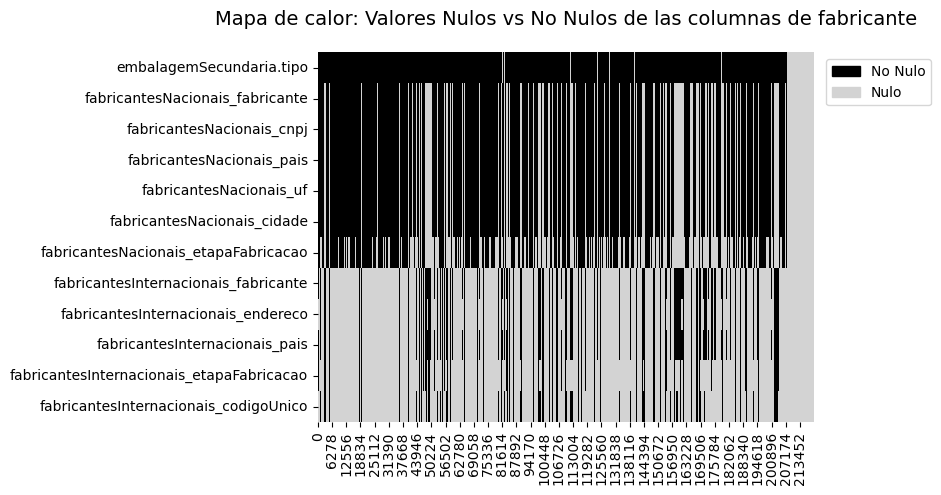

In [44]:
ax = (
    df_final_expandido.iloc[:, -12:]
    .isnull().
    transpose()
    .pipe(
        lambda df: (
            sns.heatmap(
                data=df,
                cbar=False,
                cmap=cmap,
            )
        )
    )
)
plt.title("Mapa de calor: Valores Nulos vs No Nulos de las columnas de fabricante", fontsize=14, pad=20)


legend_patches = [
    mpatches.Patch(color="black", label="No Nulo"),
    mpatches.Patch(color="lightgray", label="Nulo")
]

# Agregar la leyenda al gráfico
plt.legend(
    handles=legend_patches,
    loc="upper right",   
    bbox_to_anchor=(1.25, 1)  
)

plt.show()

In [45]:
missing_info = (
    df_final_expandido.iloc[:, -11:]
.isnull().sum()
    .to_frame("nulos")
    .assign(porcentaje=lambda x: x.nulos / len(df_final) * 100)
    .sort_values("porcentaje", ascending=False)
)
print(missing_info)

                                            nulos  porcentaje
fabricantesInternacionais_etapaFabricacao  186330   84.808404
fabricantesInternacionais_codigoUnico      180610   82.204937
fabricantesInternacionais_endereco         171138   77.893740
fabricantesInternacionais_pais             164473   74.860155
fabricantesInternacionais_fabricante       164473   74.860155
fabricantesNacionais_etapaFabricacao       114488   52.109400
fabricantesNacionais_fabricante             59838   27.235363
fabricantesNacionais_pais                   59838   27.235363
fabricantesNacionais_cnpj                   59838   27.235363
fabricantesNacionais_uf                     59838   27.235363
fabricantesNacionais_cidade                 59838   27.235363


* El % de datos nulos respecto a fabricantes nacionales tiene un impacto moderado. sin embargo con los datos del bula se podria inferir cual es el fabricante, ademas puede haber una correlacion con los datos de los fabricantes internacionales asi que tambien podria reemplazarse por un dato que indique que es fabricado en el exterior

In [46]:
df_final_expandido.restricaoPrescricao.unique().tolist()

['Venda sob prescrição médica com retenção de receita',
 'Venda sob Prescrição Médica',
 nan,
 'Venda sem Prescrição Médica',
 'Venda Sob Prescrição Médica Sujeita a Notificação de Receita "A"',
 'Venda Sob Receita de Controle Especial',
 'Venda Sob Prescrição Médica Sujeita a Notificação de Receita "B"',
 'Venda Sob Prescrição Médica Sujeita a Notificação de Receita "B2"',
 'Dispensação Sujeita a Receituário do Programa DST/AIDS']

* El % de datos nulos tiene un un impacto moderado que podria manejarse revisando el dataset para verificar si corresponden a Venda sem Prescrição Médica" (indica que no necesita preescripción)

In [47]:
df_final_expandido[['principiosAtivos','numeroProcesso']]

,principiosAtivos,numeroProcesso
0,ácido zoledrônico monoidratado,25351771065201417
1,ácido zoledrônico monoidratado,25351771065201417
2,ácido zoledrônico monoidratado,25351771065201417
3,ÁCIDO URSODESOXICÓLICO,25351843204202031
4,ÁCIDO URSODESOXICÓLICO,25351843204202031
...,...,...
219702,NaN,25351378833202167
219703,NaN,25351540996202256
219704,NaN,25351640125202151
219705,NaN,25351140602202263


* las filas con "principiosAtivos" nulos se deben eliminar ya que es un dato muy importante para el analis y estos registros afectan directamente el análisis

In [48]:
df_clean = df_final_expandido.dropna(subset=["principiosAtivos"])

### Las demas columnas pueden al tener una magnitud menor al 5% se puede continuar con el analisis y posteriormente verificar si son necesarios los datos o no lo son.
por ahora se pueden categorizar como no indica

### Exportar datos


In [49]:
df_clean.head()

,id,codigo,numeroRegistro,nomeProduto,numeroProcesso,empresaNome,empresaCnpj,principioAtivo,tarja,medicamentoReferencia,...,fabricantesNacionais_cnpj,fabricantesNacionais_pais,fabricantesNacionais_uf,fabricantesNacionais_cidade,fabricantesNacionais_etapaFabricacao,fabricantesInternacionais_fabricante,fabricantesInternacionais_endereco,fabricantesInternacionais_pais,fabricantesInternacionais_etapaFabricacao,fabricantesInternacionais_codigoUnico
0,1,1012584,188300060,ácido zoledrônico,25351771065201417,VIATRIS FARMACEUTICA DO BRASIL LTDA,11643096000122,ÁCIDO ZOLEDRÔNICO MONOIDRATADO,Vermelha sob restrição,ZOMETA,...,NaN,NaN,NaN,NaN,NaN,MYLAN LABORATORIES LIMITED [OTL],"PLOT N° 284-B, BOMMASANDRA, JIGANI LINK ROAD, ...",ÍNDIA,Processo produtivo completo,A000463
1,1,1012584,188300060,ácido zoledrônico,25351771065201417,VIATRIS FARMACEUTICA DO BRASIL LTDA,11643096000122,ÁCIDO ZOLEDRÔNICO MONOIDRATADO,Vermelha sob restrição,ZOMETA,...,NaN,NaN,NaN,NaN,NaN,MYLAN LABORATORIES LIMITED [OTL],"PLOT N° 284-B, BOMMASANDRA, JIGANI LINK ROAD, ...",ÍNDIA,Processo produtivo completo,A000463
2,1,1012584,188300060,ácido zoledrônico,25351771065201417,VIATRIS FARMACEUTICA DO BRASIL LTDA,11643096000122,ÁCIDO ZOLEDRÔNICO MONOIDRATADO,Vermelha sob restrição,ZOMETA,...,NaN,NaN,NaN,NaN,NaN,MYLAN LABORATORIES LIMITED [OTL],"PLOT N° 284-B, BOMMASANDRA, JIGANI LINK ROAD, ...",ÍNDIA,Processo produtivo completo,A000463
3,2,1595612,123520278,ácido ursodesoxicólico,25351843204202031,RANBAXY FARMACÊUTICA LTDA,73663650000190,ÁCIDO URSODESOXICÓLICO,Vermelha,Ursacol®,...,NaN,NaN,NaN,NaN,NaN,SUN PHARMACEUTICAL INDUSTRIES LIMITED.,"VILLAGE GANGUWALA, PAONTA SAHIB 173 025, DISTR...",ÍNDIA,Processo produtivo completo,A000928
4,2,1595612,123520278,ácido ursodesoxicólico,25351843204202031,RANBAXY FARMACÊUTICA LTDA,73663650000190,ÁCIDO URSODESOXICÓLICO,Vermelha,Ursacol®,...,NaN,NaN,NaN,NaN,NaN,SUN PHARMACEUTICAL INDUSTRIES LIMITED.,"VILLAGE GANGUWALA, PAONTA SAHIB 173 025, DISTR...",ÍNDIA,Processo produtivo completo,A000928


In [50]:
df_clean.dtypes

id                                             int64
codigo                                        object
numeroRegistro                                object
nomeProduto                                   object
numeroProcesso                                object
empresaNome                                   object
empresaCnpj                                   object
principioAtivo                                object
tarja                                         object
medicamentoReferencia                         object
classesTerapeuticas                           object
bula_txt                                      object
bula_pdf                                      object
bula_txt_profissional                         object
bula_pdf_profissional                         object
categoriaRegulatoria                          object
situacaoRegistro                              object
dataProduto                                   object
dataVencimentoRegistro                        

In [51]:

cols = ["numero", "id", "apresentacoes.codigo"]
df_clean[cols] = df_clean[cols].astype("object")

/tmp/ipykernel_99063/2175063590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[cols] = df_clean[cols].astype("object")


In [ ]:
(
    df_clean.dtypes.value_counts()
)

object    59
Name: count, dtype: int64

: 

In [ ]:
df_clean.to_json("df_revision_valores_faltantes.json", orient="records", force_ascii=False)
